<h1 align='center'; color ='blue'><b><font color='pickle'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='pickle'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [173]:
import spacy
nlp = spacy.load('en_core_web_sm')   
import joblib

In [174]:
import custom_preprocessor as cp
from lrcurve import PlotLearningCurve


In [175]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/NLP/spam.csv",encoding = "ISO-8859-1")
data=data.iloc[:,:2]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
data=data.rename(columns={"v1":"label","v2":"message"})
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [177]:
percent_of_ham=(len(data[data['label']=='ham'])/len(data))*100
percent_of_ham

86.59368269921033

In [178]:
percent_of_spam=100-percent_of_ham 
percent_of_spam

13.406317300789667

# <font color='pickle'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

In [179]:
# we can use precision_score,ROC curve for accuracy metric for now!    
data 

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [180]:
data['label'] =np.where(data["label"]=='spam',1,0)                                                                             
data  

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# <font color='pickle'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:** 

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn: 

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





In [183]:
# we will use the feature eng technique for practice situation now-1
import nltk

data['num_char']=data['message'].apply(len)
data['num_words']=data['message'].apply(lambda x: len(str(x).split()))
data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x))) 




In [184]:
def digits(x):
    doc=nlp(x)

    return sum([token.is_digit for token in doc])

data['num_digits']=data['message'].apply(lambda x: digits(x))

In [185]:
data 

,label,message,num_char,num_words,num_sentences,num_digits
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0
1,0,Ok lar... Joking wif u oni...,29,6,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3
3,0,U dun say so early hor... U c already then say...,49,11,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0


In [186]:
def exclamation(x):
    doc=nlp(x)
    count = sum(map(lambda p : 1 if '!' in p else 0, x))
    return count 

data['exclamation_count']=data['message'].apply(lambda x:exclamation(x))
data





,label,message,num_char,num_words,num_sentences,num_digits,exclamation_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0,0
1,0,Ok lar... Joking wif u oni...,29,6,2,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3,0
3,0,U dun say so early hor... U c already then say...,49,11,1,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0,0
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3,1
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0,0
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0,0


In [189]:
from collections import Counter 
def count_pnoun(x):
    pnouns = [token.pos_ for token in nlp(x)]
    return pnouns.count("PROPN")

data['pnoun_count']= pd.DataFrame(data['message'].apply(count_pnoun).tolist())


In [190]:
from collections import Counter 
def count_noun(x):
    nouns = [token.pos_ for token in nlp(x)]
    return nouns.count("NOUN")           

data['noun_count']= pd.DataFrame(data['message'].apply(count_noun).tolist())        

In [191]:
data  

,label,message,num_char,num_words,num_sentences,num_digits,exclamation_count,pnoun_count,noun_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0,0,6,3
1,0,Ok lar... Joking wif u oni...,29,6,2,0,0,1,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3,0,7,5
3,0,U dun say so early hor... U c already then say...,49,11,1,0,0,2,3
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3,1,4,8
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0,0,3,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0,0,0,3
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0,0,0,3


In [192]:
from collections import Counter 
def count_verb(x):
    verb = [token.pos_ for token in nlp(x)]
    return verb.count("VERB")

data['verb_count']= pd.DataFrame(data['message'].apply(count_verb).tolist()) 

In [193]:
data 

,label,message,num_char,num_words,num_sentences,num_digits,exclamation_count,pnoun_count,noun_count,verb_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0,0,6,3,2
1,0,Ok lar... Joking wif u oni...,29,6,2,0,0,1,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3,0,7,5,4
3,0,U dun say so early hor... U c already then say...,49,11,1,0,0,2,3,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3,1,4,8,3
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0,0,3,1,2
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0,0,0,3,0
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0,0,0,3,4


In [194]:
from collections import Counter 
def count_adverb(x):
    adverb = [token.pos_ for token in nlp(x)]
    return adverb.count("ADP")

data['adverb_count']= pd.DataFrame(data['message'].apply(count_adverb).tolist()) 

In [195]:
data

,label,message,num_char,num_words,num_sentences,num_digits,exclamation_count,pnoun_count,noun_count,verb_count,adverb_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0,0,6,3,2,2
1,0,Ok lar... Joking wif u oni...,29,6,2,0,0,1,2,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3,0,7,5,4,2
3,0,U dun say so early hor... U c already then say...,49,11,1,0,0,2,3,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0,0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3,1,4,8,3,1
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0,0,3,1,2,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0,0,0,3,0,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0,0,0,3,4,3


In [138]:
from collections import Counter 
def count_adj(x):
    nouns = [token.pos_ for token in nlp(x)]
    return nouns.count("ADJ")

data['adject_count']= pd.DataFrame(data['message'].apply(count_adj).tolist()) 

In [196]:
data 

,label,message,num_char,num_words,num_sentences,num_digits,exclamation_count,pnoun_count,noun_count,verb_count,adverb_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,0,0,6,3,2,2
1,0,Ok lar... Joking wif u oni...,29,6,2,0,0,1,2,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,3,0,7,5,4,2
3,0,U dun say so early hor... U c already then say...,49,11,1,0,0,2,3,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0,0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4,3,1,4,8,3,1
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,0,0,3,1,2,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2,0,0,0,3,0,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,0,0,0,3,4,3


In [208]:
X=data.iloc[:,2:]
X

,num_char,num_words,num_sentences,num_digits,exclamation_count,pnoun_count,noun_count,verb_count,adverb_count
0,111,20,2,0,0,6,3,2,2
1,29,6,2,0,0,1,2,2,0
2,155,28,2,3,0,7,5,4,2
3,49,11,1,0,0,2,3,2,0
4,61,13,1,0,0,2,0,3,1
...,...,...,...,...,...,...,...,...,...
5567,161,30,4,3,1,4,8,3,1
5568,37,8,1,0,0,3,1,2,0
5569,57,10,2,0,0,0,3,0,2
5570,125,26,1,0,0,0,3,4,3


In [210]:
y=data.iloc[:,0]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [215]:
classifier_1b = Pipeline([('vectorizer', CountVectorizer(analyzer='word', token_pattern=r"[\S]+")),
                         ('classifier', LogisticRegression(max_iter = 10000)),
                        ])

In [216]:
param_grid_classifier_1b = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                           
                           'classifier__C': [ 0.1, 1, 10, 100, 100000]}

In [219]:
minmax_scaler=MinMaxScaler()
X=minmax_scaler.fit_transform(X)
print(X.shape)
print(X)

(5572, 9)
[[0.12004405 0.11176471 0.03703704 ... 0.10344828 0.05882353 0.11111111]
 [0.02973568 0.02941176 0.03703704 ... 0.06896552 0.05882353 0.        ]
 [0.1685022  0.15882353 0.03703704 ... 0.17241379 0.11764706 0.11111111]
 ...
 [0.06057269 0.05294118 0.03703704 ... 0.10344828 0.         0.11111111]
 [0.13546256 0.14705882 0.         ... 0.10344828 0.11764706 0.16666667]
 [0.02643172 0.02941176 0.03703704 ... 0.03448276 0.02941176 0.05555556]]


In [220]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [224]:
from sklearn.pipeline import Pipeline

In [248]:
from distutils.log import Log
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(("clf",LogisticRegression()))

In [255]:
parameters = {'classifier__C': [ 0.1, 1, 10, 100, 100000]} 



In [256]:
grid_search = GridSearchCV(pipe, parameters)

In [253]:
grid_search.fit(X_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)

TypeError: 'LogisticRegression' object is not subscriptable

In [246]:
print(pipe.steps)

('clf', <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>)


In [197]:
#--------------------------------------------------------------------------------#


# a new approach


In [143]:
import pandas as pd
import numpy as np
from pathlib import Path
import textwrap as tw
import matplotlib.pyplot as plt

# save and load models
import joblib

import re

#from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 

In [149]:
# removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/NLP/spam.csv",encoding = "ISO-8859-1")
data=data.iloc[:,:2]
data=data.rename(columns={"v1":"label","v2":"message"})
data['label'] =np.where(data["label"]=='spam',1,0)
data['message_no_sws'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) ]))
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,message_no_sws
0,0,"Go until jurong point, crazy.. Available only ...","Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I think goes usf, lives around though"
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This 2nd time tried 2 contact u. U å£750 Pound...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì_ b going esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...","Pity, * mood that. So...any suggestions?"
5570,0,The guy did some bitching but I acted like i'd...,The guy bitching I acted like i'd interested b...


In [150]:
import custom_preprocessor as cp
tfidf_vectorizer  = TfidfVectorizer()

X_train, X_test, y_train, y_test = train_test_split(data['message_no_sws'], data["label"], test_size = 0.3)
#X_train = cp.SpacyPreprocessor(model = nlp, remove_stop=True).transform(X_train)

# training_data = tfidf_vectorizer.fit_transform(X_train)


# testing_data = tfidf_vectorizer.transform(X_test)

In [151]:
X_train_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_train.to_numpy())

C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [152]:
X_train_cleaned_sparse_embed =  "C:/Users/kusha/OneDrive/Desktop/NLP/x_train_cleaned_sparse_embed.pkl"
joblib.dump(X_train, X_train_cleaned_sparse_embed)

['C:/Users/kusha/OneDrive/Desktop/NLP/x_train_cleaned_sparse_embed.pkl']

In [153]:
X_test_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_test.to_numpy())

In [154]:
import numpy as np
# print(training_data)
X_test_cleaned_sparse_embed = "C:/Users/kusha/OneDrive/Desktop/NLP/x_test_cleaned_sparse_embed.pkl"

In [155]:
joblib.dump(X_test_cleaned, X_test_cleaned_sparse_embed) 

['C:/Users/kusha/OneDrive/Desktop/NLP/x_test_cleaned_sparse_embed.pkl']

In [156]:
classifier_1a = Pipeline([('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
                         ('classifier', LogisticRegression(max_iter = 10000)),
                        ]) 

                        

In [157]:

param_grid_classifier_1a = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                           
                           'classifier__C': [ 0.1, 1, 10, 100, 100000]}

In [158]:
grid_classifier_1a = GridSearchCV(estimator=classifier_1a, param_grid=param_grid_classifier_1a, cv = 3)

In [161]:
X_trained_cleaned = joblib.load(X_train_cleaned_sparse_embed)
grid_classifier_1a.fit(X_trained_cleaned, y_train) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100, 100000],
                         'vectorizer__max_features': [100, 500, 1000, 2000,
                                                      5000]})

In [162]:
print(f'Best cross-validation score: {grid_classifier_1a.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1a.best_params_)
print("\nBest estimator: ", grid_classifier_1a.best_estimator_)



Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 100000, 'vectorizer__max_features': 5000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100000, max_iter=10000))])


In [163]:

file_model_sparse_embed = 'C:/Users/kusha/OneDrive/Desktop/NLP/sparse_embed_model.pkl'

In [164]:
joblib.dump(grid_classifier_1a.best_estimator_, file_model_sparse_embed)

['C:/Users/kusha/OneDrive/Desktop/NLP/sparse_embed_model.pkl']

In [165]:
loaded_model_sparse_embed = joblib.load(file_model_sparse_embed)          

In [52]:

from lrcurve import PlotLearningCurve

In [171]:
# PlotLearningCurve(loaded_model_sparse_embed, 'Learning Curves Pipeline1', X_train_cleaned, y_train)
# plt.show()

In [167]:
grid_classifier_sparse_embed = loaded_model_sparse_embed.score(X_train_cleaned, y_train) 
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 0.9838461538461538


In [172]:
# from sklearn.model_selection import learning_curve
# plt.plot(learning_curve(loaded_model_sparse_embed, X_train_cleaned, y_train)) 
# plt.show()

In [168]:
def final_pipeline(text):
  # cleaned_text = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(text)
  cleaned_text = joblib.load(X_test_cleaned_sparse_embed)
  predictions = loaded_model_sparse_embed.predict(cleaned_text) 
  return predictions 


y_test_pred = final_pipeline(X_test) 



In [169]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred )) 


Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1446
           1       0.87      0.88      0.87       226

    accuracy                           0.97      1672
   macro avg       0.93      0.93      0.93      1672
weighted avg       0.97      0.97      0.97      1672



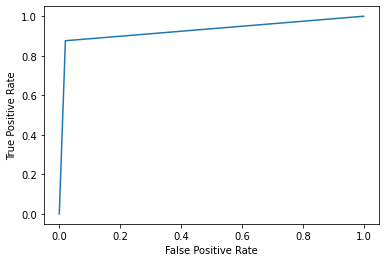

In [170]:
from sklearn import metrics   
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate') 
plt.show()





In [26]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
naive_bayes = MultinomialNB()

naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)

from sklearn.metrics import roc_curve

y_pred_proba = naive_bayes.predict_proba(testing_data)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: y_true takes value in {'ham', 'spam'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98      1468
        Spam       1.00      0.76      0.87       204

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672



<AxesSubplot:>

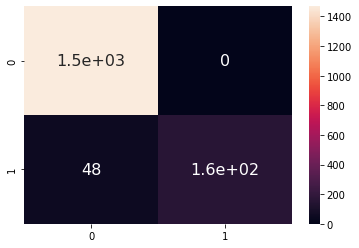

In [150]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Report Printing
print(classification_report(y_test,predictions,target_names=['Ham','Spam']))

#Confusion Matrix
conv = confusion_matrix(y_test, predictions)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

In [160]:
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
classifier_1a = Pipeline([('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")), 
                         ('classifier', LogisticRegression(max_iter = 10000)), 
                        ])        

In [162]:
param_grid_classifier_1a = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                           
                           'classifier__C': [ 0.1, 1, 10, 100, 100000]}  

In [163]:
from sklearn.model_selection import GridSearchCV
grid_classifier_1a = GridSearchCV(estimator=classifier_1a, param_grid=param_grid_classifier_1a, cv = 3)   

In [165]:
grid_classifier_1a = GridSearchCV(estimator=classifier_1a, param_grid=param_grid_classifier_1a, cv = 3)     

In [166]:
grid_classifier_1a.fit(X_train, y_train) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100, 100000],
                         'vectorizer__max_features': [100, 500, 1000, 2000,
                                                      5000]})

In [167]:
print(f'Best cross-validation score: {grid_classifier_1a.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1a.best_params_)  
print("\nBest estimator: ", grid_classifier_1a.best_estimator_)   

Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 100, 'vectorizer__max_features': 5000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


In [ ]:
 def final_pipeline(text):
  # cleaned_text = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(text)
  # cleaned_text = joblib.load(X_test_cleaned_sparse_embed)
  predictions = loaded_model_sparse_embed.predict(cleaned_text) 
  return predictions 

In [ ]:
y_test_pred = final_pipeline(X_test) 

# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**